In [28]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

csv_files=glob.glob(r".\WineDataFiles\*.csv")
dataframes=[pd.read_csv(file) for file in csv_files]

wine_df=pd.concat(dataframes,ignore_index=True)
pd.set_option("display.max_columns", None)

wine_df.head()

,Unnamed: 0,Name,Rating,Number of Ratings,Price,Region,Winery,Wine style,Alcohol content,Grapes,Food pairings,Bold,Tannin,Sweet,Acidic
0,0,Fields Of Joy Shiraz 2014,4.0,203,28.99,Australia / South Australia / Mount Lofty Rang...,Two Hands,Australian Shiraz,13.794543,NaN,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",85.00,47.13000,20.62,43.570
1,1,Shotfire GSM 2018,3.9,36,19.49,Australia / South Australia / Barossa,Thorn-Clarke,Australian Rhône Blend Red,14.500000,"Mourvedre, Shiraz/Syrah, Grenache","['Beef', 'Pasta', 'Lamb', 'Game (deer, venison)']",85.00,50.63000,9.05,43.000
2,2,Passion has Red Lips 2020,3.8,350,27.50,Australia / South Australia / Fleurieu / McLar...,Some Young Punks,Australian Cabernet - Shiraz,13.794543,NaN,"['Beef', 'Lamb', 'Poultry']",85.00,49.37000,8.19,44.780
3,3,The Hermit Crab Viognier - Marsanne 2018,3.8,1026,16.99,Australia / South Australia / Fleurieu / McLar...,d'Arenberg,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
4,4,Cabernet Sauvignon (Batch No. 1 & 3) 2019,3.8,969,14.99,Australia / South Eastern Australia,Gentleman's Collection,Australian Cabernet Sauvignon,13.794543,NaN,"['Beef', 'Lamb', 'Poultry']",76.34,49.36000,16.02,47.890


In [29]:
wine_df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Number of Ratings', 'Price', 'Region',
       'Winery', 'Wine style', 'Alcohol content', 'Grapes', 'Food pairings',
       'Bold', 'Tannin', 'Sweet', 'Acidic'],
      dtype='object')

In [30]:
wine_df.shape

(5145, 15)

In [31]:
wine_df.dtypes

Unnamed: 0             int64
Name                  object
Rating               float64
Number of Ratings      int64
Price                float64
Region                object
Winery                object
Wine style            object
Alcohol content      float64
Grapes                object
Food pairings         object
Bold                 float64
Tannin               float64
Sweet                float64
Acidic               float64
dtype: object

In [32]:
wine_df.describe

<bound method NDFrame.describe of       Unnamed: 0                                               Name  Rating  \
0              0                          Fields Of Joy Shiraz 2014     4.0   
1              1                                  Shotfire GSM 2018     3.9   
2              2                          Passion has Red Lips 2020     3.8   
3              3           The Hermit Crab Viognier - Marsanne 2018     3.8   
4              4          Cabernet Sauvignon (Batch No. 1 & 3) 2019     3.8   
...          ...                                                ...     ...   
5140         667  Katherine Goldschmidt Stonemason Hill Cabernet...     4.1   
5141         668                           Pessimist Red Blend 2020     4.0   
5142         669                            Cabernet Sauvignon 2013     3.8   
5143         670                                  Petit Verdot 2017     4.2   
5144         671                          Freakshow Chardonnay 2020     3.8   

      Number of R

In [33]:
wine_df=wine_df.drop(["Unnamed: 0"],axis=1) #remove the most unneccassry column

In [34]:
print(f"dupilcates in the data_frame:{wine_df.duplicated().sum()}") #there are 80 duplicates and we will remove them first

dupilcates in the data_frame:80


In [35]:
wine_df=wine_df.drop_duplicates()

In [36]:
wine_df.shape

(5065, 14)

In [37]:
print(f'null vales:{wine_df.isnull().sum()}')

null vales:Name                    0
Rating                  0
Number of Ratings       0
Price                   0
Region                  0
Winery                  3
Wine style            513
Alcohol content         0
Grapes               2138
Food pairings           0
Bold                    0
Tannin                  0
Sweet                   0
Acidic                  0
dtype: int64


In [38]:
wine_df[wine_df['Winery'].isna()]

,Name,Rating,Number of Ratings,Price,Region,Winery,Wine style,Alcohol content,Grapes,Food pairings,Bold,Tannin,Sweet,Acidic
1890,Prestige Sauternes 2019,4.4,61,21.99,France,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
3530,The Nest Sauvignon Blanc 2021,4.2,537,20.49,New Zealand,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
3568,Taylors Pass Vineyard Single Vineyard Sauvigno...,4.1,264,26.10,New Zealand,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555


In [39]:
wine_df=wine_df.dropna(subset=['Winery'])

#### since we had only 3 null values for "Winery" we removed only those 3 rows from the data set

In [40]:
wine_df["Grapes"] = wine_df["Grapes"].fillna("Unknown")
wine_df["Wine style"] = wine_df["Wine style"].fillna("Unknown")


##### since Wine style (513) and Grapes (2138) contain large amounts of null values we have filled them as "Unknown"

In [41]:
print(f'null vales after filling them with unknown:{wine_df.isnull().sum()}')

null vales after filling them with unknown:Name                 0
Rating               0
Number of Ratings    0
Price                0
Region               0
Winery               0
Wine style           0
Alcohol content      0
Grapes               0
Food pairings        0
Bold                 0
Tannin               0
Sweet                0
Acidic               0
dtype: int64


## Removing outliers

In [42]:
numeric_cols = ['Price', 'Rating', 'Number of Ratings', 'Alcohol content', 'Bold', 'Tannin', 'Sweet', 'Acidic']

# Keep filtering until no more outliers are removed
count = 0
while count<1:
    
    
    for col in numeric_cols:
        Q1 = wine_df[col].quantile(0.25)
        Q3 = wine_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Filter for the current column
        wine_df = wine_df[(wine_df[col] > lower) & (wine_df[col] < upper)]

    # Break when no more rows are being removed
    count = count + 1


In [43]:
wine_df.shape

(2134, 14)

{'whiskers': [<matplotlib.lines.Line2D at 0x14bd080b830>,
 'caps': [<matplotlib.lines.Line2D at 0x14bd080bda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14bcb18a930>],
 'medians': [<matplotlib.lines.Line2D at 0x14bd08fc260>],
 'fliers': [<matplotlib.lines.Line2D at 0x14bd08fc530>],
 'means': []}

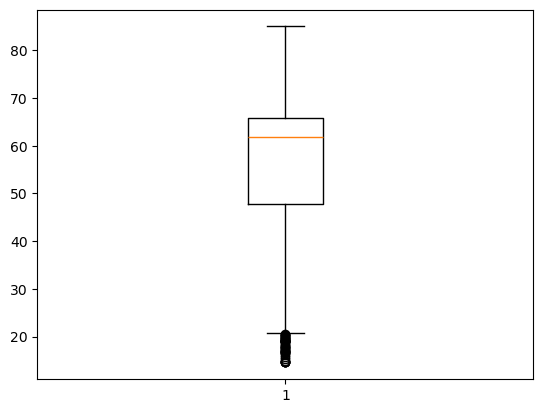

In [44]:
plt.boxplot(wine_df['Bold'])

## Each time we remove outliers, the distribution changes. 
### This changes:

Q1,Q3 and IQR which are The boundaries for what counts as an outlier.

First Run:
we calculate Q1, Q3, and IQR based on the full dataset (with all outliers).
we remove points outside the range [Q1 - 1.5xIQR , Q3 + 1.5xIQR].
But some points close to the boundary might still remain because the extreme values affected the Q1 and Q3 estimates.


Second Run:
Now, Q1 and Q3 are recalculated on the updated (cleaner) dataset.
The IQR is often smaller now, which tightens the range, and new outliers are revealed.

Third Run:
With fewer (or no) extreme values left, Q1 and Q3 stabilize.
The final filter may remove a few remaining edge cases, and eventually, no more outliers are detected.

note that we have used a while loop that automatically runs until no more outliers remain but we have set it to run once only because as it runs we get fewer and fewer data remaining in the data set. so although the extreme outliers were removed we still get outliers in the data set beacause of the above mentioned condition. 

 In conclusion,the final dataset might still have values that are technically outliers under a stricter definition, but we have managed to removed the most extreme ones while preserving the core distribution.



### Adding new columns to the Dataframe 

In [45]:
wine_df[["Country","Country_region","other"]]=wine_df["Region"].str.split("/",n=2,expand=True)